# Nonstaionary bandit algorithm experiment
- This experiment design follows the blogpost https://gdmarmerola.github.io/non-stationary-bandits/.
- The some of details is complemented.


- We consider two non-stationary problems.
> 1. The expected rewards of all arms are changing every period.
> 2. The expected rewards of all arms are linearly changing every timestep.

In [170]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
from SimulationController import SimulationController
from algorithms.EpsilonGreedy import EpsilonGreedy, EpsilonGreedyNonstationary
from algorithms.UCB import UCB
from problems.Nonstationary import NonstationaryBernoulliProblem
from utils import draw_plot

In [104]:
n_arms = 10
n_runs = 1000
n_timesteps = 3000
period = 500

## Nonstationary problem - Every k period
- The expected reward $\mu_{i}$ of arm $i$ changes every K period.
> - $\mu_{i}$ is drawn from an uniform distribution in $[0, 1]$, $\mu_{i}\sim U(0,1)$.

In [200]:
nonstationary_problem = NonstationaryBernoulliProblem(n_arms, period)
nonstationary_problem.set_problem()

In [201]:
means = {}
for t in range(n_timesteps):
    arm = np.random.choice(n_arms)
    sample, instantaneous_regret, is_opt = nonstationary_problem.gen_reward(arm, t)
    means[t] = nonstationary_problem.bandit_rewards

In [202]:
import pandas as pd
df = pd.DataFrame.from_dict(means, orient='index')
df

,0,1,2,3,4,5,6,7,8,9
0,0.124061,0.135306,0.521992,0.576920,0.800895,0.485629,0.694304,0.777197,0.085716,0.213521
1,0.124061,0.135306,0.521992,0.576920,0.800895,0.485629,0.694304,0.777197,0.085716,0.213521
2,0.124061,0.135306,0.521992,0.576920,0.800895,0.485629,0.694304,0.777197,0.085716,0.213521
3,0.124061,0.135306,0.521992,0.576920,0.800895,0.485629,0.694304,0.777197,0.085716,0.213521
4,0.124061,0.135306,0.521992,0.576920,0.800895,0.485629,0.694304,0.777197,0.085716,0.213521
...,...,...,...,...,...,...,...,...,...,...
2995,0.434385,0.450269,0.825720,0.544721,0.308026,0.299717,0.020300,0.963821,0.352053,0.248439
2996,0.434385,0.450269,0.825720,0.544721,0.308026,0.299717,0.020300,0.963821,0.352053,0.248439
2997,0.434385,0.450269,0.825720,0.544721,0.308026,0.299717,0.020300,0.963821,0.352053,0.248439
2998,0.434385,0.450269,0.825720,0.544721,0.308026,0.299717,0.020300,0.963821,0.352053,0.248439


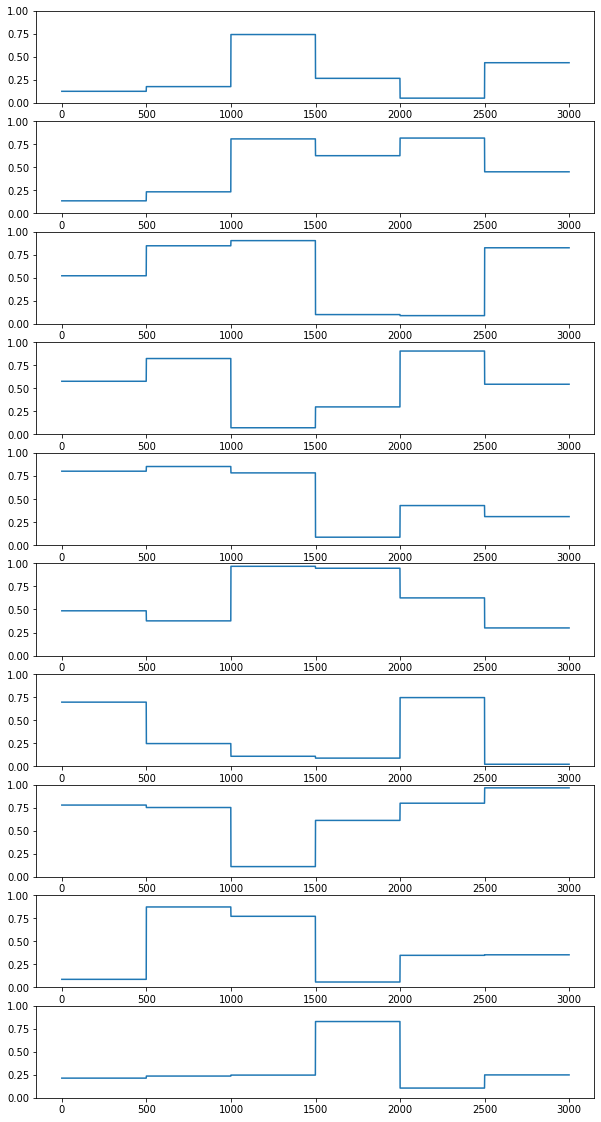

In [203]:
fig, ax = plt.subplots(n_arms, 1, figsize=(10, n_arms*2))
for arm in range(n_arms):
    ax[arm].plot(df[arm])
    ax[arm].set_ylim((0, 1))
plt.show()

## Simulation for Nonstationary problem - Every k period

In [194]:
problem = NonstationaryBernoulliProblem(n_arms, period)
models = {
    'eps-greedy(0.1)': EpsilonGreedy(n_arms, 0.1),
    'nonstationary-eps-greedy(0.1)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.9),
    'eps-greedy(0.01)': EpsilonGreedy(n_arms, 0.01),
    'nonstationary-eps-greedy(0.01)': EpsilonGreedyNonstationary(n_arms, 0.01, 0.9),
}
algos = [model for model, _ in models.items()]

In [195]:
simulation_controller = SimulationController(n_arms, n_runs, n_timesteps, models, problem)

In [196]:
opt_arm_ratio, regret, cumulative_reward = simulation_controller.run()

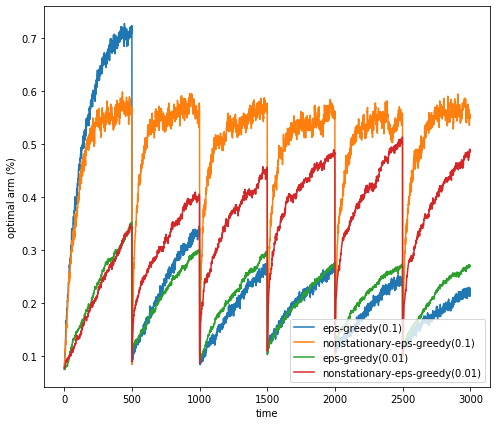

In [197]:
draw_plot(opt_arm_ratio, algos, 'optimal arm (%)')

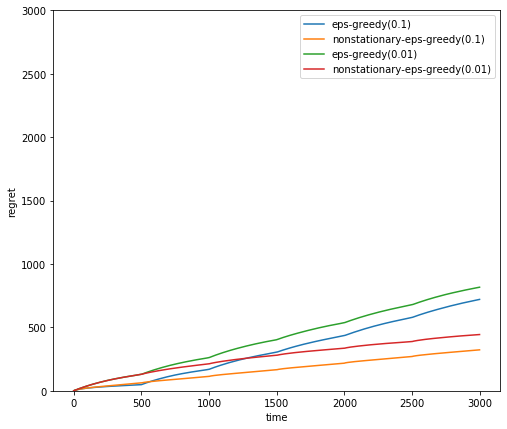

In [198]:
draw_plot(regret, algos, 'regret', loc='upper right', ylim=(0, n_timesteps))

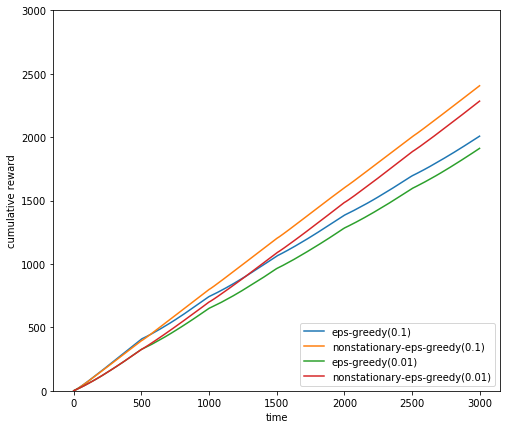

In [199]:
draw_plot(cumulative_reward, algos, 'cumulative reward', ylim=(0, n_timesteps))

## Simulation for Nonstationary problem - Every k period / Performance comparison for different parameter $\alpha$
- $\alpha$: The role is how good an algorithm's memory is. 
> - The bigger $\alpha$ is, the better an algorithm's memory is. (The algorithm memorize things in the past longer)
> - The less $\alpha$ is, the worse an algorithm's memory is. (The algorithm's memory things in the past shorter)

In [158]:
problem = NonstationaryBernoulliProblem(n_arms, period)
models = {
    'nonstationary-eps-greedy(0.1)/alpha(0.9)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.9),
    'nonstationary-eps-greedy(0.1)/alpha(0.8)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.8),
    'nonstationary-eps-greedy(0.1)/alpha(0.7)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.7),
    'nonstationary-eps-greedy(0.1)/alpha(0.6)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.6),
    'nonstationary-eps-greedy(0.1)/alpha(0.5)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.5),
    'nonstationary-eps-greedy(0.1)/alpha(0.4)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.4),
    'nonstationary-eps-greedy(0.1)/alpha(0.3)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.3),
    'nonstationary-eps-greedy(0.1)/alpha(0.3)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.2),
    'nonstationary-eps-greedy(0.1)/alpha(0.3)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.1),
}
algos = [model for model, _ in models.items()]

In [159]:
simulation_controller = SimulationController(n_arms, n_runs, n_timesteps, models, problem)

In [160]:
opt_arm_ratio, regret, cumulative_reward = simulation_controller.run()

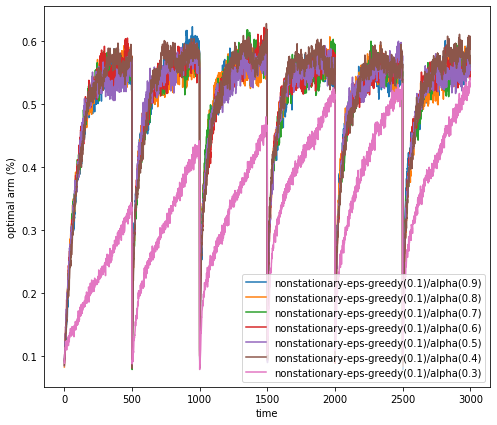

In [161]:
draw_plot(opt_arm_ratio, algos, 'optimal arm (%)')

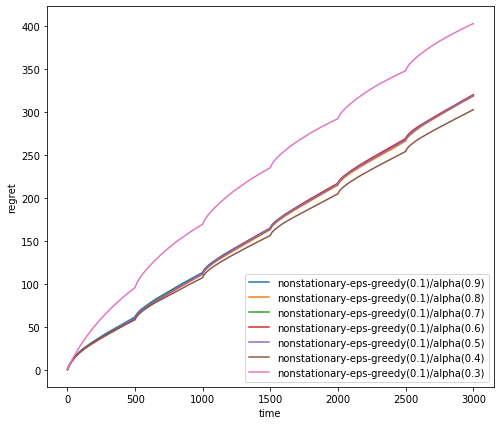

In [162]:
draw_plot(regret, algos, 'regret', loc='lower right')

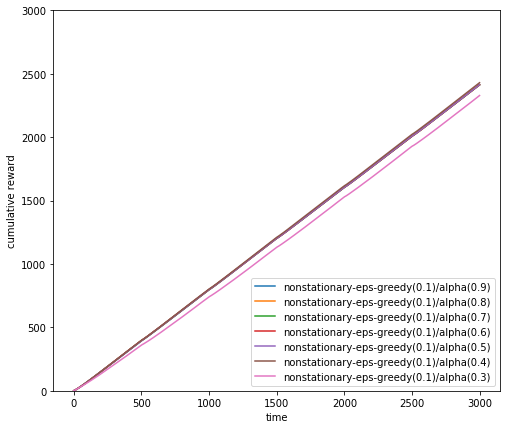

In [163]:
draw_plot(cumulative_reward, algos, 'cumulative reward', ylim=(0, n_timesteps))

## Nonstationary problem - Linear
- The expected reward $\mu_{i}$ of arm $i$ changes linearly with two parameters $\theta_{i,0}\in(0,1]$ and $\theta_{i,1}\in(0,1]$:
$$\mu_{i} = (1 - \frac{n_{i}}{T})\theta_{i,0} + \frac{n_{i}}{T}\theta_{i,1}$$
- where $n_{i}$ is the number of pulls that arm $i$ is played and $T$ is the length of period.
- $\theta_{i,j}$ is drawn from a uniform distribution with the interval $(0, 1]$.

In [204]:
nonstationary_linear_problem = NonstationaryBernoulliProblem(n_arms, n_timesteps, mode='linear')
nonstationary_linear_problem.set_problem()

In [205]:
means = {}
for t in range(n_timesteps):
    arm = np.random.choice(n_arms)
    sample, instantaneous_regret, is_opt = nonstationary_linear_problem.gen_reward(arm, t)
    means[t] = nonstationary_linear_problem.bandit_rewards

In [206]:
import pandas as pd
df = pd.DataFrame.from_dict(means, orient='index')
df

,0,1,2,3,4,5,6,7,8,9
0,0.534902,0.769132,0.426498,0.069267,0.179941,0.152592,0.658353,0.631458,0.639420,0.149946
1,0.534981,0.769154,0.426530,0.069252,0.179934,0.152683,0.658451,0.631446,0.639466,0.149976
2,0.535059,0.769175,0.426561,0.069238,0.179927,0.152773,0.658548,0.631434,0.639511,0.150006
3,0.535137,0.769197,0.426593,0.069223,0.179920,0.152864,0.658646,0.631421,0.639557,0.150035
4,0.535216,0.769218,0.426624,0.069209,0.179914,0.152954,0.658743,0.631409,0.639603,0.150065
...,...,...,...,...,...,...,...,...,...,...
2995,0.769498,0.833239,0.520653,0.025898,0.159699,0.423429,0.950327,0.594307,0.776994,0.239283
2996,0.769577,0.833260,0.520684,0.025884,0.159692,0.423519,0.950424,0.594295,0.777039,0.239313
2997,0.769655,0.833281,0.520715,0.025869,0.159685,0.423610,0.950522,0.594283,0.777085,0.239343
2998,0.769733,0.833303,0.520747,0.025855,0.159678,0.423700,0.950619,0.594270,0.777131,0.239372


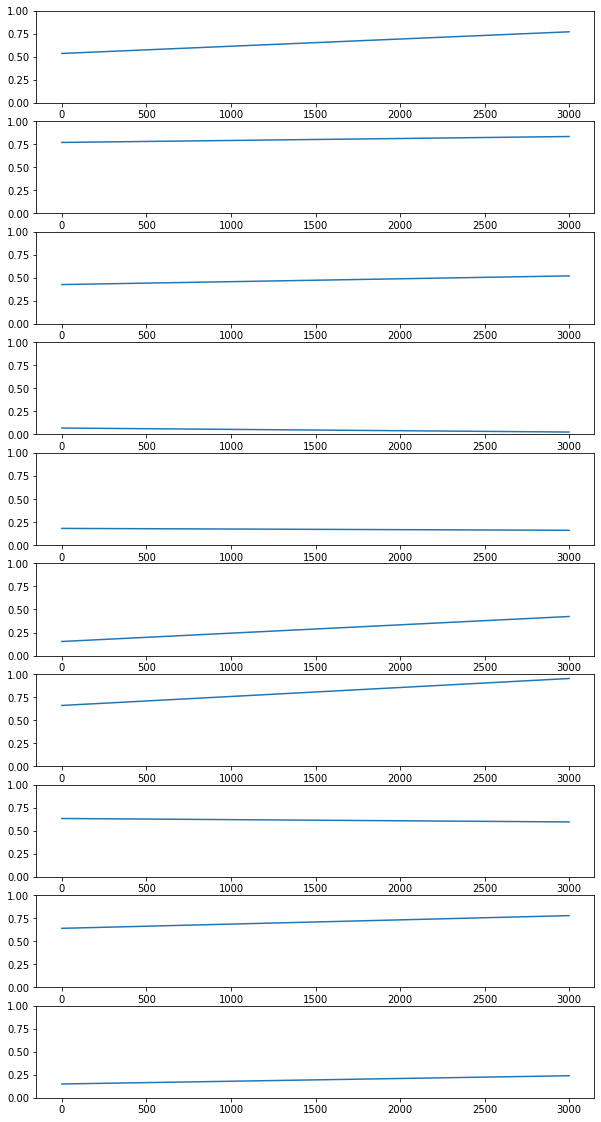

In [207]:
fig, ax = plt.subplots(n_arms, 1, figsize=(10, n_arms*2))
for arm in range(n_arms):
    ax[arm].plot(df[arm])
    ax[arm].set_ylim((0, 1))
plt.show()

## Simulation for Nonstationary problem - linear

In [208]:
problem = NonstationaryBernoulliProblem(n_arms, n_timesteps, mode='linear')
models = {
    'eps-greedy(0.1)': EpsilonGreedy(n_arms, 0.1),
    'nonstationary-eps-greedy(0.1)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.9),
    'eps-greedy(0.01)': EpsilonGreedy(n_arms, 0.01),
    'nonstationary-eps-greedy(0.01)': EpsilonGreedyNonstationary(n_arms, 0.01, 0.9),
}
algos = [model for model, _ in models.items()]

In [209]:
simulation_controller = SimulationController(n_arms, n_runs, n_timesteps, models, problem)

In [210]:
opt_arm_ratio, regret, cumulative_reward = simulation_controller.run()

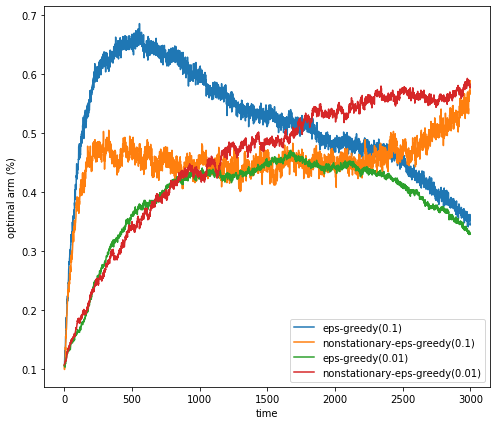

In [211]:
draw_plot(opt_arm_ratio, algos, 'optimal arm (%)')

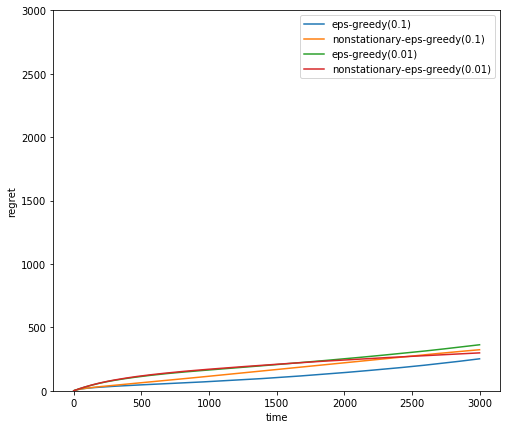

In [212]:
draw_plot(regret, algos, 'regret', loc='upper right', ylim=(0, n_timesteps))

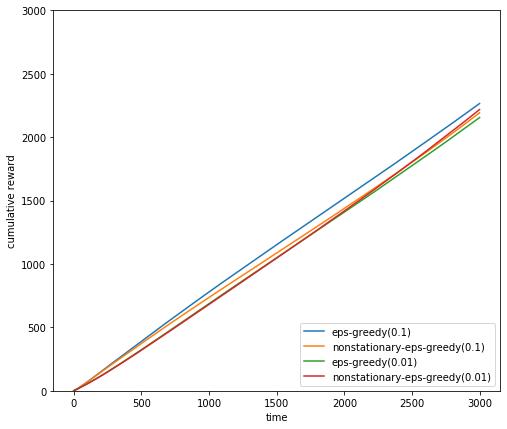

In [213]:
draw_plot(cumulative_reward, algos, 'cumulative reward', ylim=(0, n_timesteps))

## Simulation for Nonstationary problem - Linear / Performance comparison for different parameter $\alpha$

In [215]:
problem = NonstationaryBernoulliProblem(n_arms, period, mode='linear')
models = {
    'nonstationary-eps-greedy(0.1)/alpha(0.9)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.9),
    'nonstationary-eps-greedy(0.1)/alpha(0.8)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.8),
    'nonstationary-eps-greedy(0.1)/alpha(0.7)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.7),
    'nonstationary-eps-greedy(0.1)/alpha(0.6)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.6),
    'nonstationary-eps-greedy(0.1)/alpha(0.5)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.5),
    'nonstationary-eps-greedy(0.1)/alpha(0.4)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.4),
    'nonstationary-eps-greedy(0.1)/alpha(0.3)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.3),
    'nonstationary-eps-greedy(0.1)/alpha(0.3)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.2),
    'nonstationary-eps-greedy(0.1)/alpha(0.3)': EpsilonGreedyNonstationary(n_arms, 0.1, 0.1),
}
algos = [model for model, _ in models.items()]

In [216]:
simulation_controller = SimulationController(n_arms, n_runs, n_timesteps, models, problem)

In [217]:
opt_arm_ratio, regret, cumulative_reward = simulation_controller.run()

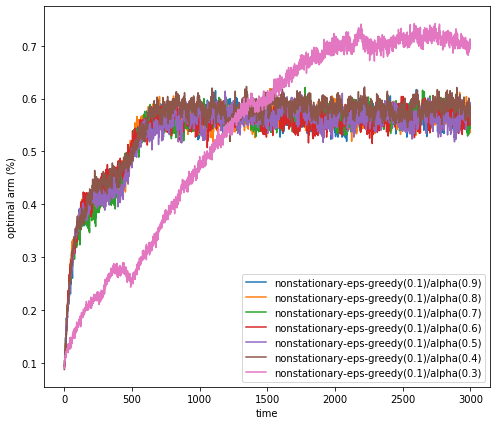

In [218]:
draw_plot(opt_arm_ratio, algos, 'optimal arm (%)')

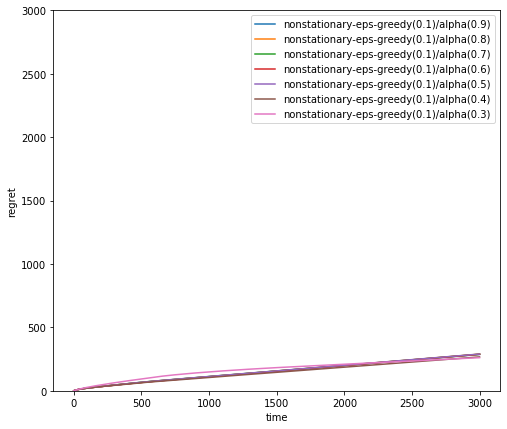

In [219]:
draw_plot(regret, algos, 'regret', loc='upper right', ylim=(0, n_timesteps))

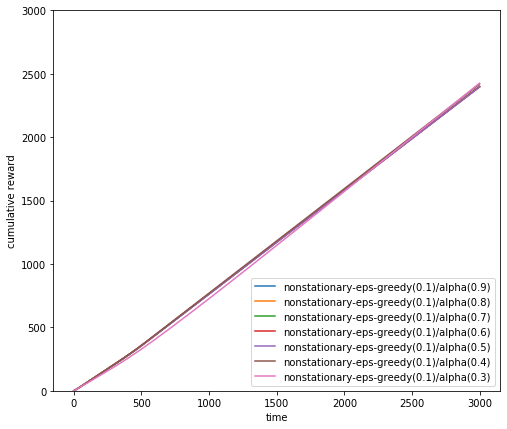

In [220]:
draw_plot(cumulative_reward, algos, 'cumulative reward', ylim=(0, n_timesteps))